# ARIMA and Seasonal ARIMA

### AutoRegressive Integrated Moving Averages


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('datasets/perrin-freres-monthly-champagne-.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.columns = ["Month", "Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [6]:
# Drop last 2 rows
df = df.iloc[:-2]

In [18]:
df.tail()

,Sales
Month,
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0
1972-08-01,1413.0
1972-09-01,5877.0


In [19]:
df.to_csv('dataset.csv')

In [8]:
df['Month'] = pd.to_datetime(df['Month'])
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [9]:
df.set_index('Month', inplace=True)
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


### Visulize the data

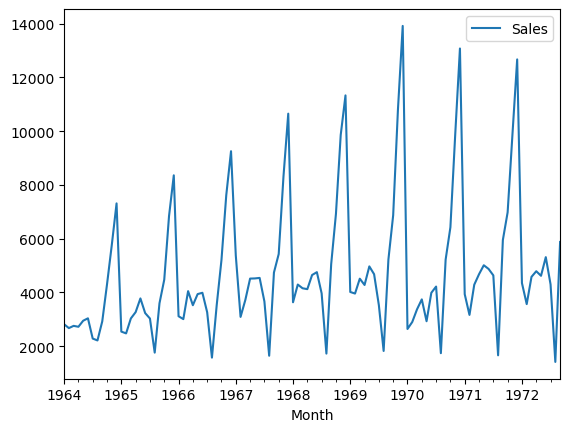

In [12]:
df.plot()
plt.show();

In [13]:
from statsmodels.tsa.stattools import adfuller

test_result = adfuller(df['Sales'])

In [14]:
test_result

(-1.833593056327616,
 0.3639157716602485,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [16]:
# H0: It's non stationary
# H1: It's stataionary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ["ADF Test Statistics", "p-value", "#Lags Used", "# of Observations Used"]
    for value, label in zip(result,labels):
        print(label+' : '+str(value))

    if result[1] <= 0.05:
        print('Strong Evidence against the null hypothesis(H0), reject the null hypothesis. Data is no unit root and is stationary')
    else: 
        print('Weak evidence against null hypothesis, time series has a unit root, indicating it is non stationary')

In [17]:
adfuller_test(df['Sales'])

ADF Test Statistics : -1.833593056327616
p-value : 0.3639157716602485
#Lags Used : 11
# of Observations Used : 93
Weak evidence against null hypothesis, time series has a unit root, indicating it is non stationary
